In [1]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
import time
from matplotlib import pyplot as plt

In [677]:
def clean_result(sim_game, over_under, a_margin):
    """
    Takes simulated game and produces relevant lines
    """
    totals = []
    for item in sim_game[1]:
        totals.append(item[0]+item[1])

    t_array = np.array(totals)-10
    under_prob= np.mean(t_array<over_under)
    over_prob= np.mean(t_array>over_under)

    if (under_prob<.6)and(over_prob)<.6:
        print('Over-Under Wash')
        print()

    else:
        print('Over {} probabilty: {}%'.format(over_under, np.round(100*over_prob, 1)))
        print('Under {} probabilty: {}%'.format(over_under, np.round(100*under_prob, 1)))
        print()

    margins = []
    for aaa in sim_game[1]:
        margins.append(aaa[0]-aaa[1])

    margins_b = []
    for aaa in sim_game[1]:
        margins_b.append(aaa[1]-aaa[0])

    a_cover = np.mean(np.array(margins)>a_margin)
    b_cover = np.mean(np.array(margins_b) > -a_margin)

    if (a_cover<.6)and(b_cover<.6):
        print('Spread Wash')
        print()

    else:
        print('Team A cover {} probability: {}%'.format(-a_margin, np.round(100*a_cover, 1)))
        print('Team B cover {} probability: {}%'.format(a_margin, np.round(100*b_cover, 1)))
        print()

    a_win = np.mean([x[0]>x[1] for x in sim_game[1]])

    print('Team A win probability: {}%'.format(np.round(100*a_win, 1)))
    print('Team B win probability: {}%'.format(np.round(100*(1-a_win), 1)))
    return 0

    
    

In [2]:
#if one team does not have data for a certain starting state, we will get a row of nan's which will break the code.
#if this occurs, we can just substitute the average probability for this row?
avg_matrix = pd.read_excel('avg_transition_matrix_with_manual_edits.xlsx', sheet_name = 'Mean Pasted', index_col='Starting_State')

In [648]:
team_A = pd.read_excel("team_specific_matrix/Morehead St._A.xlsx", index_col = 'Starting_State')
team_B = pd.read_excel("team_specific_matrix/Lindenwood_B.xlsx", index_col = 'Starting_State')

In [649]:
transition_matrix = combine_team_matrix(team_A, team_B)

In [650]:
abc = simulate_game(transition_matrix, num_games=500)

In [651]:
OU = 132.5
team_A_margin = 21

In [676]:
clean_result(abc, OU, team_A_margin)

Over 132.5 probabilty: 80.4%
Under 132.5 probabilty: 19.6%

Team A cover 21 probability: 23.6%
Team B cover -21 probability: 74.2%

Team A win probability: 79.8%
Team B win probability: 20.2%


0

In [652]:
totals = []
for item in abc[1]:
    totals.append(item[0]+item[1])

In [653]:
t_array = np.array(totals)-10

In [654]:
np.mean(t_array<OU)

0.196

In [655]:
np.mean(t_array>OU)

0.804

In [656]:
margins = []
for aaa in abc[1]:
    margins.append(aaa[0]-aaa[1])

In [657]:
margins_b = []
for aaa in abc[1]:
    margins_b.append(aaa[1]-aaa[0])

In [658]:
np.mean(np.array(margins)>team_A_margin)

0.236

In [659]:
np.mean(np.array(margins_b) > -team_A_margin)

0.742

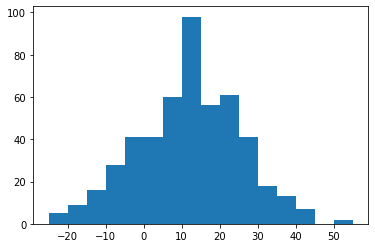

In [660]:
plt.hist(margins, bins=np.linspace(-25,55,17));

In [661]:
np.mean(margins)

11.572

In [662]:
np.median(margins)

12.0

In [663]:
np.mean([x[0]>x[1] for x in abc[1]])

0.798